<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>February 28, 2018: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, matricial characterization of Hermite interpolating polynomials.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t, alpha

init_printing()

In [2]:
%run ../../src/matrix_functions.py
%run ../../src/sequences.py

In [24]:
d = IndexedBase('d')
g = Function('g')

---

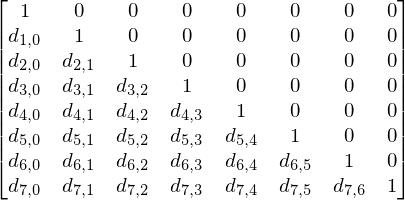

In [4]:
m=8
R = Matrix(m, m, riordan_matrix_by_recurrence(m, lambda n, k: {(n, k):1 if n == k else d[n, k]}))
R

In [5]:
data, eigenvals, multiplicities = eigendata = eigen_data(R)
eigendata

In [6]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

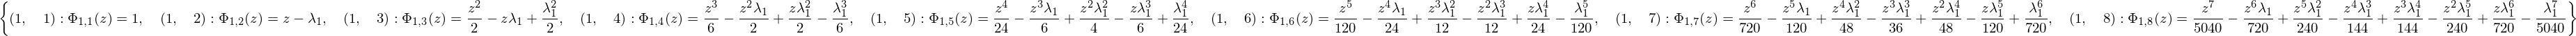

In [7]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

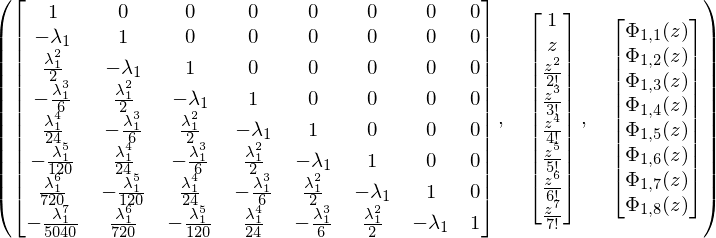

In [8]:
res_expt = M_expt, z_expt, Phi_expt =(
    Matrix(m, m, lambda n,k: (-lamda_indexed[1])**(n-k)/(factorial(n-k)) if n-k >= 0 else 0),
    Matrix([z**i/factorial(i, evaluate=i<2) for i in range(m)]),
    Matrix([Function(r'\Phi_{{ {}, {} }}'.format(1, j))(z) for j in range(1, m+1)]))

res_expt

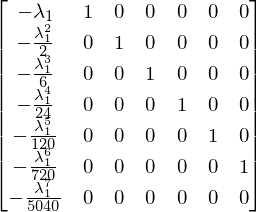

In [9]:
production_matrix(M_expt)

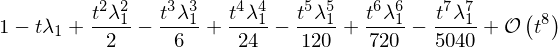

In [10]:
exp(-lamda_indexed[1]*t).series(t, n=m)

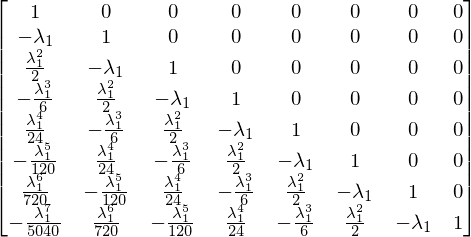

In [11]:
g, f = Function('g'), Function('f')
ERA = Matrix(m, m, riordan_matrix_by_convolution(m, 
                                                 d=Eq(g(t), exp(-lamda_indexed[1]*t)), 
                                                 h=Eq(f(t), t)))
ERA

In [12]:
assert M_expt == ERA

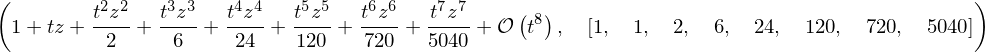

In [13]:
exp(z*t).series(t, n=m), [factorial(i) for i in range(m)]

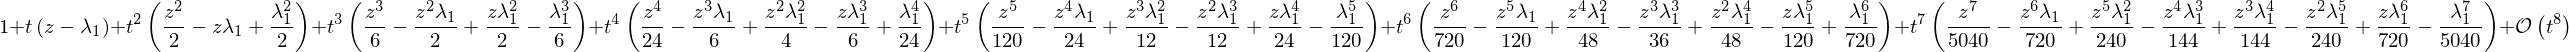

In [14]:
exp(t*(z-lamda_indexed[1])).series(t, n=m)

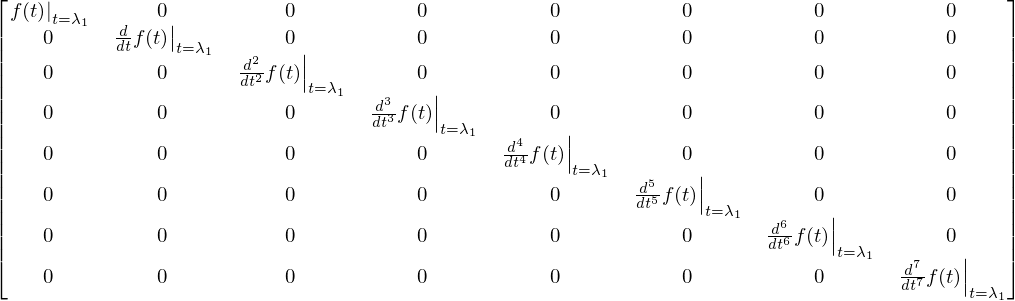

In [15]:
partials = Matrix(m, m, lambda n, k: Subs(f(t).diff(t, n), [t], [lamda_indexed[1]]) if n==k else 0)
partials

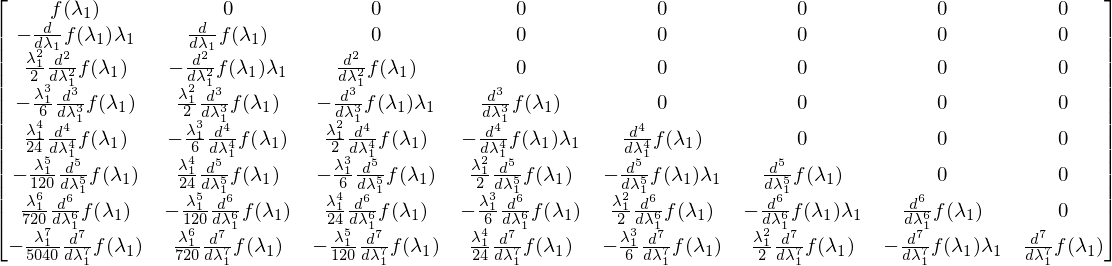

In [16]:
DE = (partials * M_expt).applyfunc(lambda i: i.doit())
DE

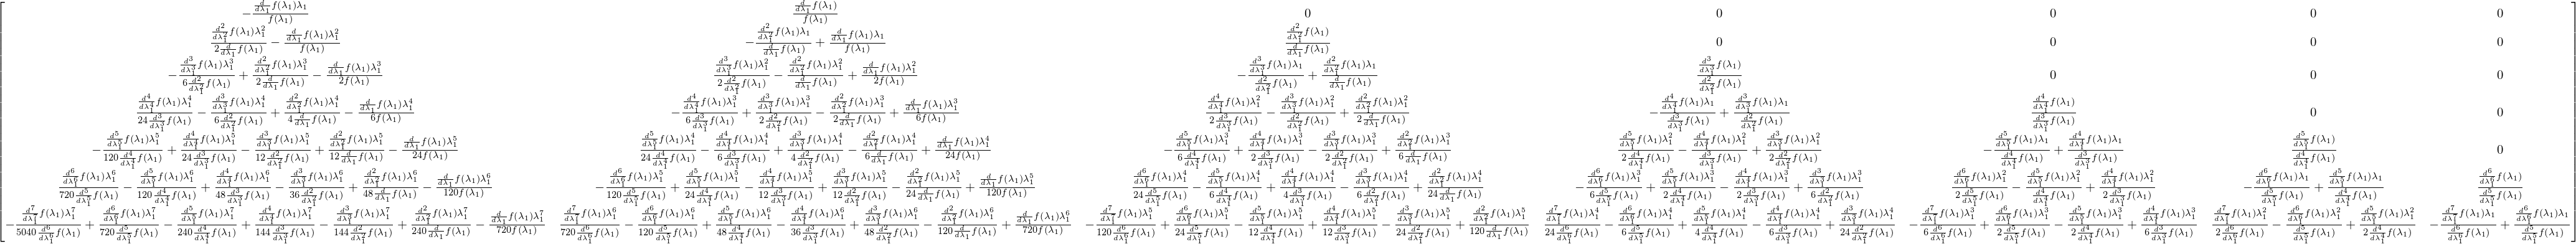

In [17]:
production_matrix(DE).applyfunc(simplify)

In [18]:
f_t = pow(t, n)
i = 1
(f_t.diff(*([t]*(i+1)), evaluate=False)/f_t.diff(*([t]*i), evaluate=False)).doit().subs({t:1}).simplify()

## $f(z)=\frac{1}{z}$

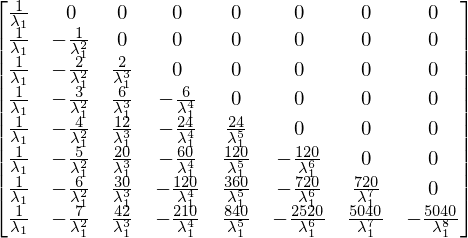

In [68]:
DE_inv = DE.subs({f:Lambda(t, 1/t)}).applyfunc(lambda i: i.doit())
DE_inv

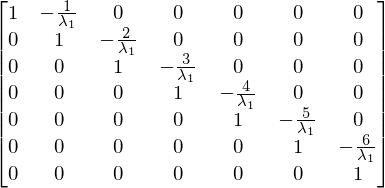

In [69]:
production_matrix(DE_inv)

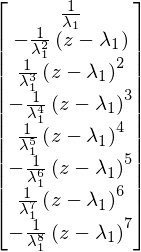

In [70]:
DEz = (DE_inv* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

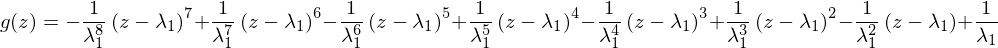

In [71]:
g_v = ones(1, m) * DEz
Eq(g(z), g_v[0,0], evaluate=False)

In [150]:
h = Function(r'h_{1}')
spec = h(t)
#h_bar = Function(r'\bar{{ {} }}'.format(spec.func.__name__)) 
h_bar = Function(r'\bar{{ {} }}'.format(str(spec.func))) 
h_bar(x)

In [171]:
%run ../../src/sequences.py

In [174]:
C_eq = Eq(h(t), (1-sqrt(1-4*t))/2)
compositional_inverse(C_eq)

y*(-y + 1)


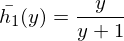

In [163]:
C_eq = Eq(h(t), t/(1-t))
compositional_inverse(C_eq)

-sqrt(-4*t + 1)/2 + 1/2


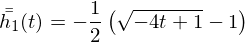

In [175]:
compositional_inverse(_, y=t, check=False)

## $f(z)=z^{r}$

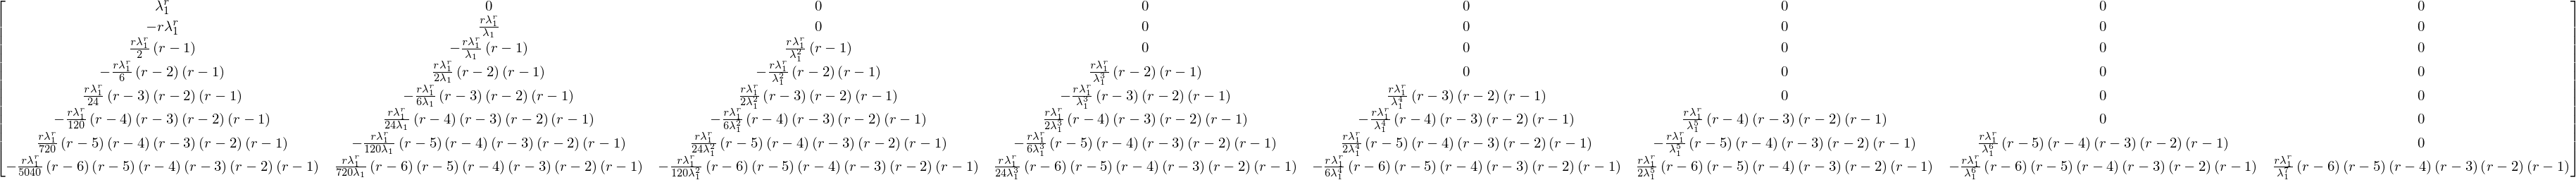

In [33]:
DE_pow = DE.subs({f:Lambda(t, t**r)}).applyfunc(lambda i: i.doit().factor())
DE_pow

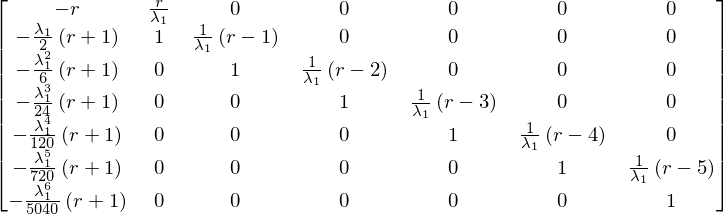

In [34]:
production_matrix(DE_pow)

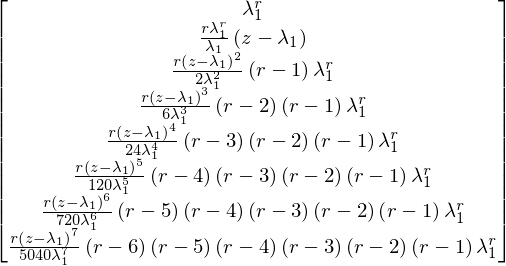

In [38]:
DEz = (DE_pow* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

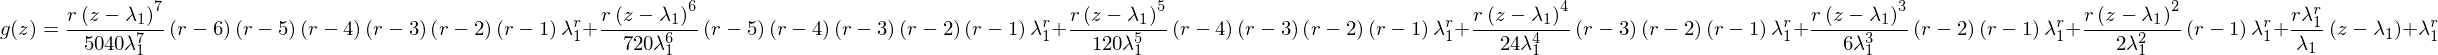

In [43]:
g_v = ones(1, m) * DEz
Eq(g(z), g_v[0,0].collect(z), evaluate=False)

## $f(z)=\sqrt{z}$

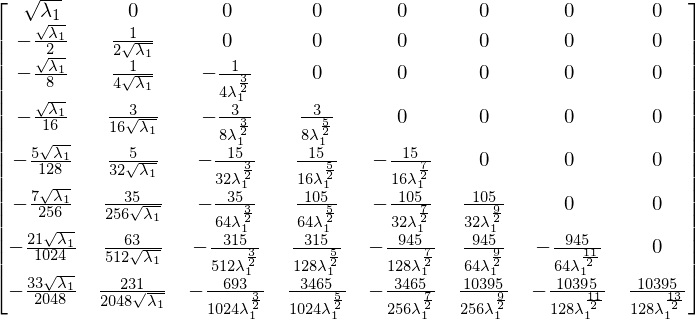

In [83]:
DE_sqrt = DE.subs({f:Lambda(t, sqrt(t))}).applyfunc(lambda i: i.doit().factor())
DE_sqrt

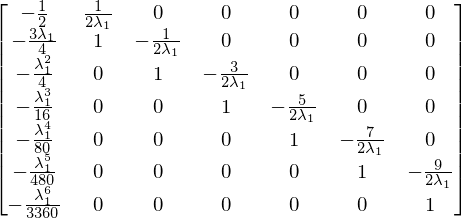

In [84]:
production_matrix(DE_sqrt)

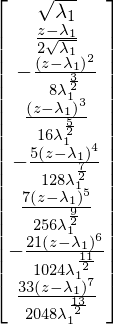

In [85]:
DEz = (DE_sqrt* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

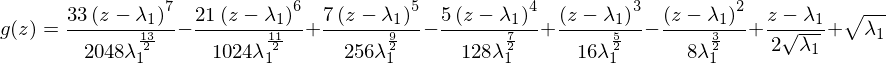

In [117]:
g_v = ones(1, m) * DEz
g_sqrt = Eq(g(z), g_v[0,0].collect(z), evaluate=False)
g_sqrt

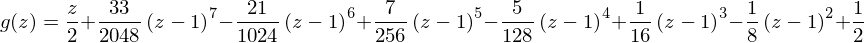

In [124]:
g_sqrt.subs(eigenvals)

In [120]:
%run ../../src/matrix_functions.py

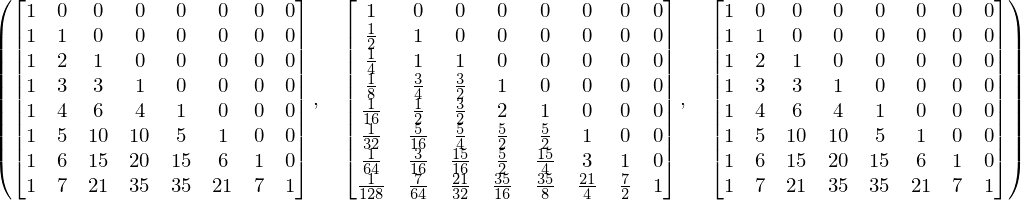

In [123]:
P = Matrix(m, m, binomial)
with lift_to_matrix_function(g_sqrt) as _g_sqrt:
    P_sqrt = _g_sqrt(P).subs(eigenvals)

P, P_sqrt, P_sqrt**2

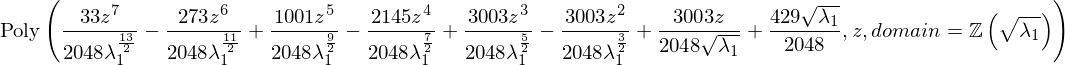

In [108]:
p = Poly(g_sqrt.rhs, z)
p

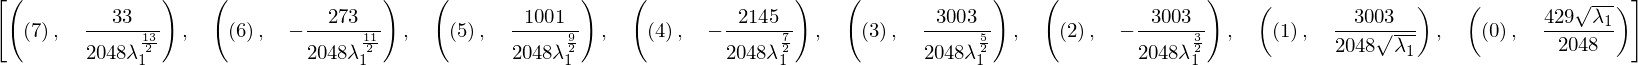

In [116]:
p.terms()

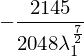

In [114]:
p.args[0].coeff(z,n=4)

In [115]:
dict([(1,2)])

## $f(z)=e^{z}$

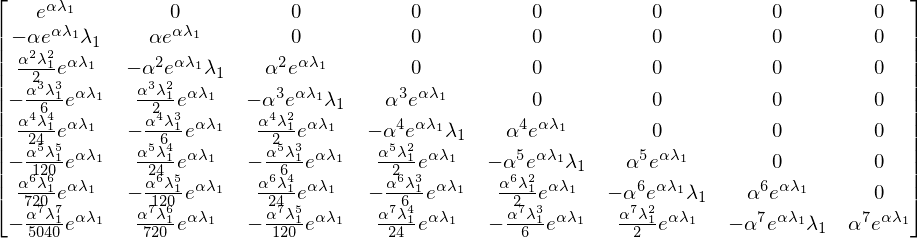

In [48]:
DE_expt = DE.subs({f:Lambda(t, exp(alpha*t))}).applyfunc(lambda i: i.doit().factor())
DE_expt

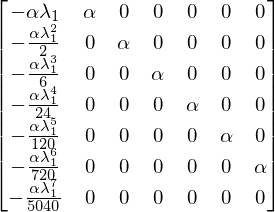

In [49]:
production_matrix(DE_expt)

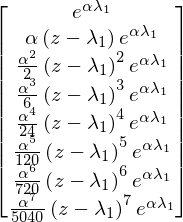

In [50]:
DEz = (DE_expt* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

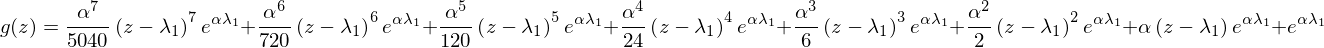

In [53]:
g_v = ones(1, m) * DEz
Eq(g(z), g_v[0,0].collect(z), evaluate=False)

## $f(z)=\log{z}$

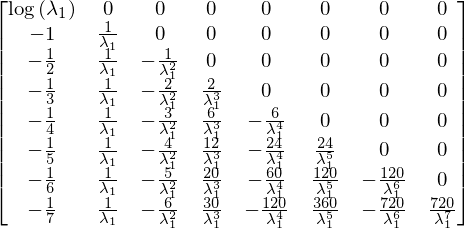

In [55]:
DE_log = DE.subs({f:Lambda(t, log(t))}).applyfunc(lambda i: i.doit().factor())
DE_log

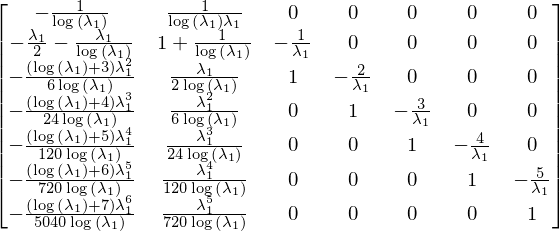

In [56]:
production_matrix(DE_log)

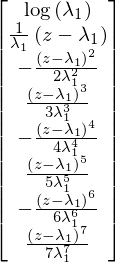

In [57]:
DEz = (DE_log* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

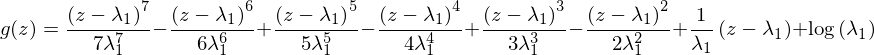

In [58]:
g_v = ones(1, m) * DEz
Eq(g(z), g_v[0,0].collect(z), evaluate=False)

## $f(z)=\sin{z}$

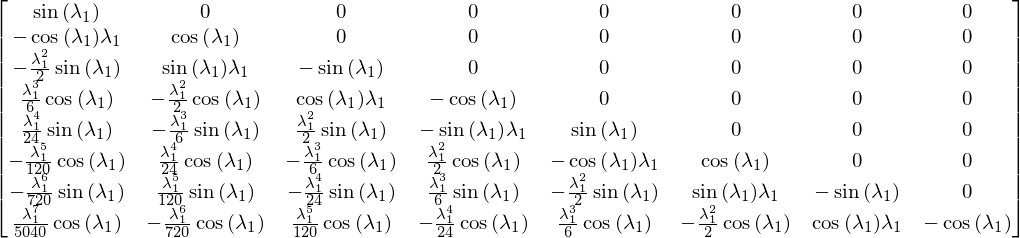

In [126]:
DE_sin = DE.subs({f:Lambda(t, sin(t))}).applyfunc(lambda i: i.doit().factor())
DE_sin

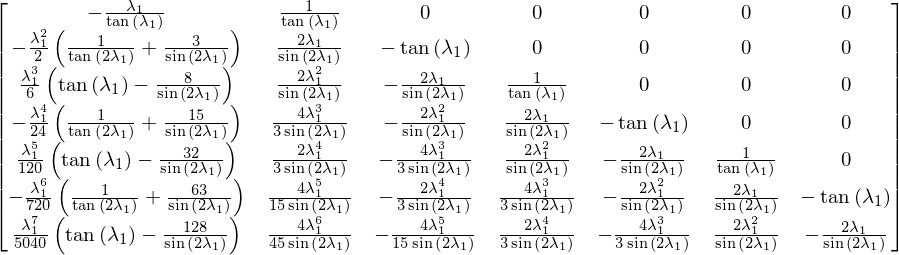

In [127]:
production_matrix(DE_sin)

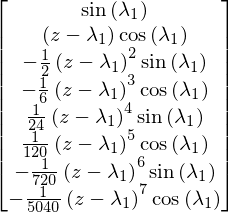

In [128]:
DEz = (DE_sin* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

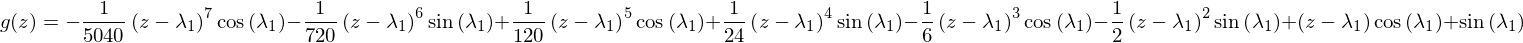

In [129]:
g_v = ones(1, m) * DEz
g_sin = Eq(g(z), g_v[0,0].collect(z), evaluate=False)
g_sin

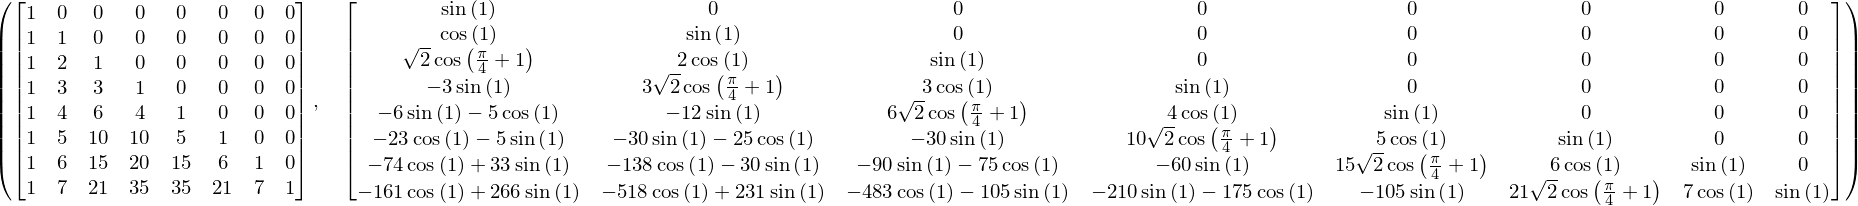

In [133]:
P = Matrix(m, m, binomial)
with lift_to_matrix_function(g_sin) as _g_sin:
    P_sin = _g_sin(P).subs(eigenvals).applyfunc(trigsimp)

P, P_sin

## $f(z)=\cos{z}$

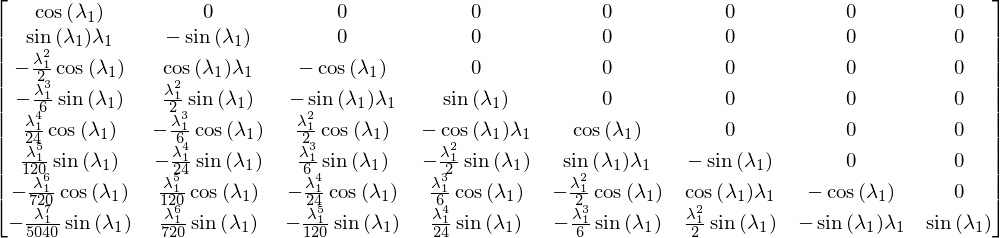

In [72]:
DE_cos = DE.subs({f:Lambda(t, cos(t))}).applyfunc(lambda i: i.doit().factor())
DE_cos

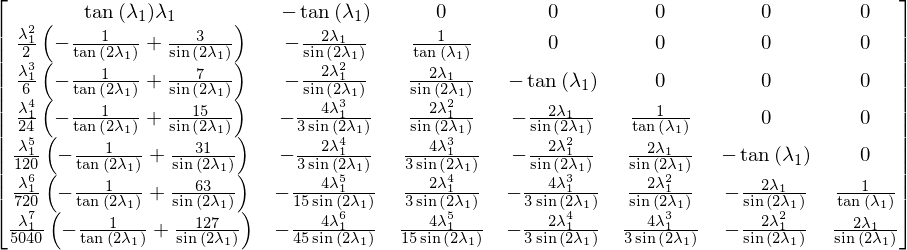

In [74]:
production_matrix(DE_cos)

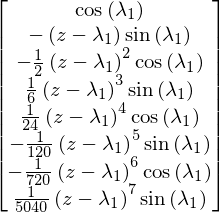

In [75]:
DEz = (DE_cos* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

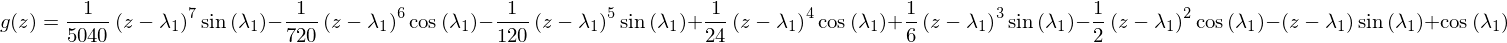

In [76]:
g_v = ones(1, m) * DEz
Eq(g(z), g_v[0,0].collect(z), evaluate=False)

## $f(z)=\tan{z}$

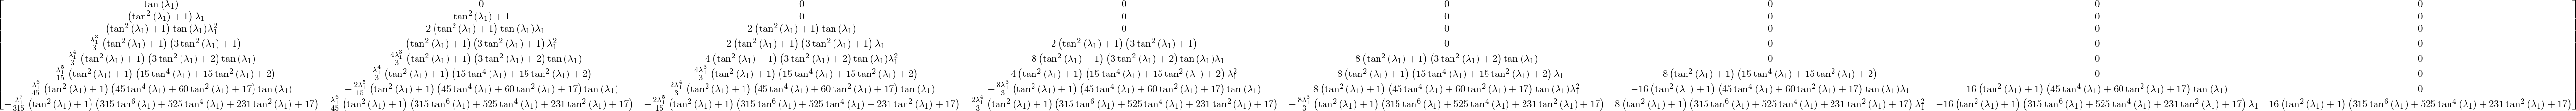

In [77]:
DE_tan = DE.subs({f:Lambda(t, tan(t))}).applyfunc(lambda i: i.doit().factor())
DE_tan

In [78]:
production_matrix(DE_tan)

KeyboardInterrupt: 

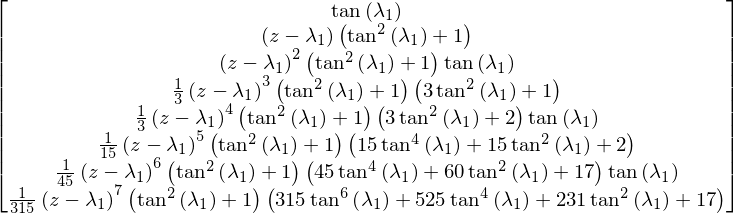

In [79]:
DEz = (DE_tan* z_expt).applyfunc(lambda i: i.doit().factor())
DEz

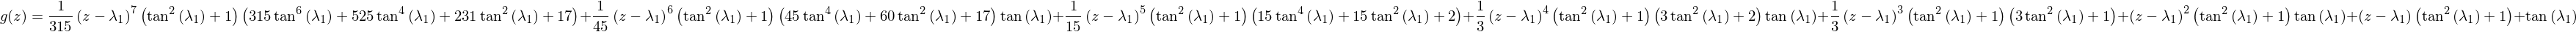

In [80]:
g_v = ones(1, m) * DEz
Eq(g(z), g_v[0,0].collect(z), evaluate=False)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.